This Notebook is meant to give a brief explanation on how this script works. <br>
The main thing you will have to handle are the instantiations of objects inside the Field package : 

In [1]:
from ReadData.read_info import get_reference_values
from src.Field.rans_field import RansField
from src.Field.perturbation_field import PerturbationField
from src.Field.post_process import PostProcess

The Field package contains 3 classes :
- RansField : it allows to retrieve the value from the CFD Rans simulation
- PerturbationField : it takes care of the perturbation field. It also computes the total field based on the assumptions that the total flow is a superposition of the mean steady flow (retrieved from the RansField class) and the unsteady perturbation associated. 
- PostProcess : it contains the main methods for plotting relevant data such as fields, profile for a specific x value. It also retrieves  the statistical values of the Rans simulation as well as the data concerning the stability analysis. 

Let's see how it works : 
    

In [2]:
St_04_1 = PostProcess(St=0.4, ID_MACH=1, epsilon=0.01, t=0) 

Here we instantiate an object from the PostProcess class. We give the Strouhal number, the ID relative to the mach case, epsilon which is the amplitude of perturbation and t is a dimensionless time based on the period T (cf docs) <br>
We can now plot various quantities : 

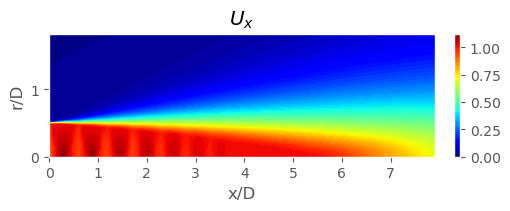

In [3]:
St_04_1.plot_field(field='rans', name_value='ux', x_min=0, x_max=8, r_min=0, r_max=2)

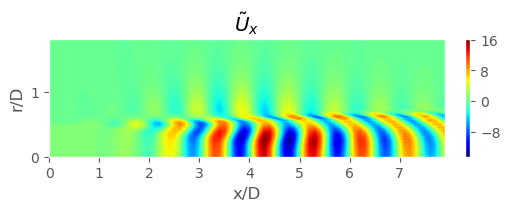

In [4]:
St_04_1.plot_field(field='total', name_value='ux', x_min=0, x_max=8, r_min=0, r_max=2)


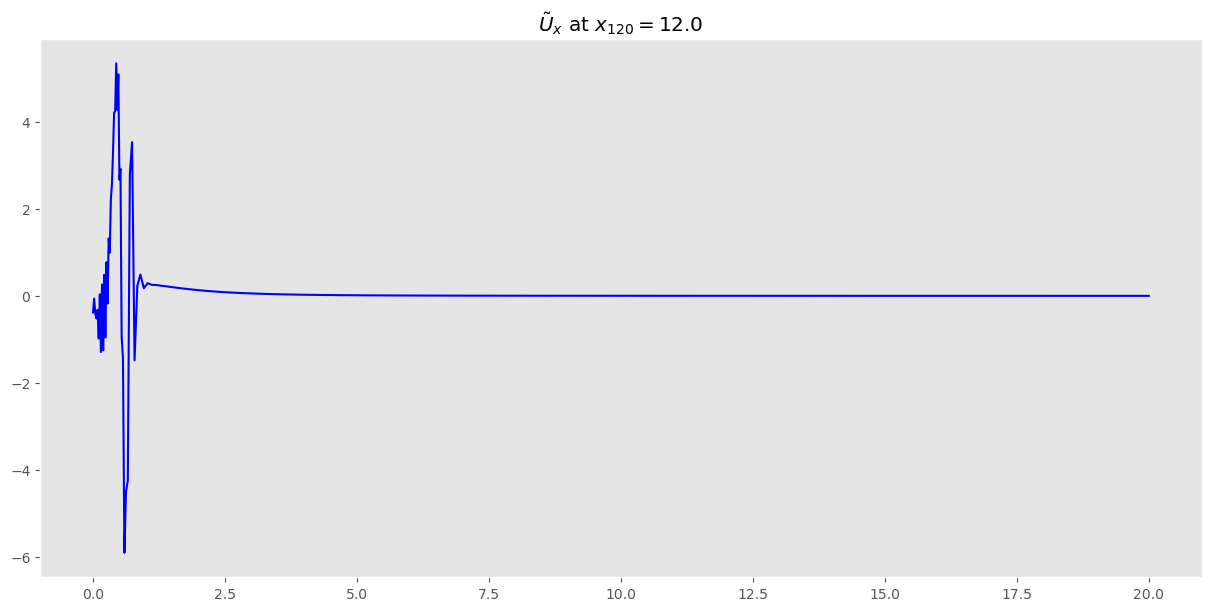

In [12]:
St_04_1.plot_line(field='total', name_value='ux', x_idx=120)

In [6]:
St_04_1.get_fields_stats('ux')

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.630565,0.630270,0.629520,0.628519,0.627023,0.625200,0.622899,0.620288,0.617270,0.613738,...,0.005504,0.004528,0.003778,0.003181,0.002740,0.002378,0.002120,0.001904,0.001748,0.001642
std,0.295265,0.295241,0.294738,0.294154,0.293232,0.292049,0.290437,0.288819,0.286931,0.284821,...,0.001896,0.001287,0.000869,0.000540,0.000376,0.000216,0.000172,0.000113,0.000072,0.000069
min,0.255531,0.255517,0.255465,0.255372,0.255263,0.255094,0.254941,0.254753,0.254476,0.254200,...,0.003464,0.003019,0.002737,0.002484,0.002260,0.002067,0.001902,0.001765,0.001654,0.001569
25%,0.351845,0.352405,0.352374,0.352134,0.351777,0.351343,0.350682,0.350059,0.349306,0.348606,...,0.004026,0.003595,0.003217,0.002854,0.002499,0.002221,0.002032,0.001793,0.001668,0.001574
50%,0.540897,0.540688,0.540180,0.539349,0.538266,0.536787,0.534933,0.532700,0.530118,0.527423,...,0.004479,0.004010,0.003292,0.002947,0.002659,0.002314,0.002061,0.001892,0.001760,0.001656
75%,0.977066,0.976558,0.976418,0.975498,0.975455,0.963145,0.959985,0.951900,0.943354,0.934468,...,0.006386,0.005461,0.004141,0.003579,0.002820,0.002520,0.002190,0.001920,0.001788,0.001691
max,1.118812,1.115502,1.111625,1.107907,1.098813,1.093370,1.084213,1.079672,1.075514,1.069056,...,0.010863,0.008244,0.006157,0.004760,0.003879,0.002977,0.002576,0.002287,0.001920,0.001800


For more information, a documentation is provided for each class and methods. <br>
If you only want a visualisation of fields and on, this class only is self-sufficient. However, you would probably want to operate on the fields themselves : 


In [7]:
pert_field = PerturbationField(0.4, 1)
abs_ux = pert_field.values['abs(ux)']
abs_ux

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,1.288147,1.288827,1.292124,1.298072,1.306515,1.317559,1.330913,1.346959,1.365722,1.387446,...,5.489807e-08,7.720099e-09,4.778064e-10,7.472594e-10,4.335228e-10,2.163879e-10,1.089234e-10,6.999277e-11,9.579725e-11,6.209828e-10
1,1.455491,1.456891,1.460686,1.466640,1.474175,1.482700,1.491690,1.501680,1.513697,1.529184,...,3.322912e-06,1.525885e-06,6.814761e-07,2.978040e-07,1.269728e-07,5.319330e-08,2.264472e-08,1.160670e-08,1.149408e-08,1.147356e-07
2,1.525736,1.529931,1.537940,1.550570,1.568304,1.590739,1.616948,1.645640,1.676934,1.710750,...,1.567841e-05,7.492710e-06,3.450752e-06,1.542994e-06,6.715271e-07,2.867220e-07,1.243518e-07,6.519272e-08,6.655364e-08,6.319864e-07
3,1.841754,1.842662,1.846485,1.852724,1.862889,1.876766,1.895077,1.916137,1.941534,1.970126,...,3.790443e-05,1.850956e-05,8.687398e-06,3.945796e-06,1.740861e-06,7.524675e-07,3.302759e-07,1.756842e-07,1.825077e-07,1.673337e-06
4,2.326330,2.325621,2.327865,2.331808,2.338110,2.345103,2.353755,2.362119,2.373182,2.384948,...,6.955694e-05,3.463572e-05,1.654452e-05,7.626780e-06,3.407999e-06,1.489711e-06,6.610276e-07,3.562532e-07,3.755169e-07,3.336231e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,4.489429,5.460470,4.108842,7.801373,7.608219,8.908037,9.804155,6.094127,9.762840,2.696204,...,1.045545e-06,4.689078e-07,2.061270e-07,8.858778e-08,3.721013e-08,1.531691e-08,6.346739e-09,3.088251e-09,2.497873e-09,3.104342e-08
197,4.581742,5.548736,4.247605,7.895136,7.733842,8.919605,9.890284,6.098184,9.726097,2.657263,...,1.017226e-06,4.548742e-07,2.000185e-07,8.643476e-08,3.674366e-08,1.541277e-08,6.559594e-09,3.346108e-09,3.181458e-09,3.334440e-08
198,4.684469,5.646595,4.392851,7.996739,7.866151,8.940247,9.982243,6.109610,9.692191,2.624005,...,9.921742e-07,4.408199e-07,1.926797e-07,8.298271e-08,3.530361e-08,1.489741e-08,6.413256e-09,3.345183e-09,3.466137e-09,3.347270e-08
199,4.798996,5.754783,4.545281,8.107514,8.006404,8.972032,10.081487,6.129884,9.662098,2.597140,...,9.726598e-07,4.292503e-07,1.860243e-07,7.939693e-08,3.350172e-08,1.405686e-08,6.035694e-09,3.152830e-09,3.399338e-09,3.190622e-08


In this script, all the fields are the values of a dictionary. They are DataFrame from the pandas library and you are able to perform any operations needed : 
  

In [8]:
c_ref = get_reference_values(ID_MACH=1)['ux']
abs_ux_dimensionised = pert_field.values['abs(ux)'] * c_ref
abs_ux_dimensionised

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,401.295418,401.507227,402.534370,404.387189,407.017430,410.458145,414.618180,419.616977,425.462136,432.229763,...,0.000017,0.000002,1.488506e-07,2.327931e-07,1.350550e-07,6.741112e-08,3.393280e-08,2.180479e-08,2.984363e-08,1.934542e-07
1,453.428013,453.863967,455.046344,456.901095,459.248561,461.904191,464.704900,467.816952,471.560847,476.385436,...,0.001035,0.000475,2.122997e-04,9.277464e-05,3.955572e-05,1.657126e-05,7.054490e-06,3.615827e-06,3.580740e-06,3.574349e-05
2,475.311253,476.617930,479.113279,483.047861,488.572363,495.561706,503.726573,512.664718,522.413960,532.948505,...,0.004884,0.002334,1.075010e-03,4.806874e-04,2.092002e-04,8.932225e-05,3.873922e-05,2.030943e-05,2.073340e-05,1.968822e-04
3,573.759881,574.042936,575.233788,577.177511,580.344143,584.667295,590.371861,596.932540,604.844476,613.751686,...,0.011808,0.005766,2.706378e-03,1.229230e-03,5.423288e-04,2.344155e-04,1.028906e-04,5.473076e-05,5.685646e-05,5.212933e-04
4,724.719612,724.498582,725.197778,726.426199,728.389518,730.568010,733.263267,735.868772,739.315499,742.980702,...,0.021669,0.010790,5.154100e-03,2.375964e-03,1.061691e-03,4.640884e-04,2.059294e-04,1.109832e-04,1.169845e-04,1.039333e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1398.587886,1701.095514,1280.023883,2430.355071,2370.181847,2775.113122,3054.280022,1898.498040,3041.409133,839.946234,...,0.000326,0.000146,6.421458e-05,2.759767e-05,1.159204e-05,4.771664e-06,1.977194e-06,9.620802e-07,7.781602e-07,9.670930e-06
197,1427.346262,1728.592945,1323.252663,2459.564822,2409.317197,2778.716829,3081.111590,1899.762069,3029.962524,827.814915,...,0.000317,0.000142,6.231159e-05,2.692695e-05,1.144672e-05,4.801527e-06,2.043505e-06,1.042410e-06,9.911169e-07,1.038775e-05
198,1459.348653,1759.078875,1368.500993,2491.217335,2450.535181,2785.147507,3109.759685,1903.321601,3019.400067,817.454079,...,0.000309,0.000137,6.002535e-05,2.585153e-05,1.099810e-05,4.640977e-06,1.997916e-06,1.042122e-06,1.079803e-06,1.042772e-05
199,1495.027182,1792.782652,1415.987349,2525.726819,2494.228170,2795.049367,3140.676958,1909.637605,3010.025064,809.084880,...,0.000303,0.000134,5.795198e-05,2.473446e-05,1.043676e-05,4.379122e-06,1.880294e-06,9.821984e-07,1.058993e-06,9.939717e-06


Here, we have converted the dimensionless |ux| into a quantity with a dimension. We don't detail here the ReadData package but each module has a function that retrieves a dataframe. <dr>
Note that this script work for any Strouhal and Mach Case as long as they are provided in the Data directory. Also note that the only requirement concerning the naming of files is that they need to end with the specific ID_MACH. <br>

PerturbationField provides the possibility to convert the dimensionless values of the PSE into the reference of the Rans system for nondimensionalisation :  

In [11]:
converted_pse_values = PerturbationField.convert_to_rans_reference(dimless_field=pert_field.values, ID_MACH=1)

converted_pse_values['Re(ux)']

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-0.387666,-0.388511,-0.392058,-0.398787,-0.407923,-0.420312,-0.435035,-0.453373,-0.473341,-0.497477,...,-8.062801e-09,-5.688790e-09,-1.360699e-10,6.553440e-10,-3.798224e-10,1.786789e-10,-7.917026e-11,3.787041e-11,-8.427078e-12,-3.478020e-10
1,-0.177509,-0.178851,-0.182106,-0.187513,-0.194521,-0.203541,-0.214069,-0.226704,-0.239917,-0.255763,...,5.480238e-07,1.334718e-07,-2.285481e-07,1.612432e-07,-8.876785e-08,4.310819e-08,-1.996601e-08,1.062403e-08,-9.727781e-09,-1.035590e-07
2,0.156234,0.155402,0.154119,0.152405,0.150053,0.146675,0.141524,0.134378,0.125644,0.114754,...,4.324851e-06,-2.612161e-08,-8.845268e-07,7.390984e-07,-4.394674e-07,2.241290e-07,-1.077667e-07,5.957259e-08,-5.711532e-08,-5.655578e-07
3,0.674070,0.671484,0.667583,0.661947,0.654972,0.646886,0.637600,0.627060,0.615438,0.602770,...,6.149884e-06,2.483031e-06,-3.475260e-06,2.422074e-06,-1.336863e-06,6.504145e-07,-3.006996e-07,1.582762e-07,-1.367353e-07,-1.531271e-06
4,1.395448,1.391913,1.386943,1.379827,1.370393,1.357969,1.342426,1.323469,1.302297,1.278584,...,1.666061e-06,1.011829e-05,-9.181975e-06,5.690075e-06,-2.939851e-06,1.358593e-06,-5.974995e-07,2.927932e-07,-2.106081e-07,-2.916087e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.914612,4.460291,2.639197,-1.466637,6.103983,-4.839823,8.743606,-5.416478,7.592875,-2.376512,...,3.658561e-07,-1.643249e-07,7.346163e-08,-3.270667e-08,1.451422e-08,-6.406335e-09,2.885314e-09,-1.591114e-09,1.642098e-09,1.472002e-08
197,3.735026,4.699969,-0.365033,4.372177,1.423819,1.741977,7.310998,-2.590814,8.489670,-1.046910,...,8.836176e-07,-3.943241e-07,1.732325e-07,-7.495203e-08,3.199282e-08,-1.351237e-08,5.804093e-09,-3.002022e-09,2.911953e-09,2.972749e-08
198,3.929694,1.602743,-3.326796,7.308904,-4.484878,7.194659,0.663948,2.036964,3.410314,0.970932,...,7.745415e-07,-3.461337e-07,1.521926e-07,-6.583539e-08,2.805264e-08,-1.180861e-08,5.047421e-09,-2.587390e-09,2.444698e-09,2.605622e-08
199,1.147052,-2.805914,-3.982911,5.063299,-7.328349,7.652088,-6.648304,5.303223,-4.125565,2.281825,...,1.264195e-07,-5.938359e-08,2.778443e-08,-1.284168e-08,5.834083e-09,-2.592264e-09,1.157385e-09,-6.164644e-10,4.924161e-10,6.198567e-09


This method require to pass a field so that it can handle several types of fields (the pse field or q_prime for example). 